In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

In [ ]:
# Mengunduh data Bitcoin
symbol = "BTC-USD"
data = yf.download(tickers=symbol, interval="5d", period="max")

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Menghitung Moving Average (MA)
data['MA_3'] = data['Close'].rolling(window=3).mean()  # 3-day moving average
data['MA_5'] = data['Close'].rolling(window=5).mean()  # 5-day moving average

In [ ]:
# Menghitung Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data, window=7)  # Menggunakan periode RSI 7

Price           Adj Close          Close           High           Low  \
Ticker            BTC-USD        BTC-USD        BTC-USD       BTC-USD   
Date                                                                    
2014-09-17     457.334015     457.334015     468.174011    452.421997   
2014-09-22     402.152008     402.152008     406.915985    397.130005   
2014-09-27     399.519989     399.519989     406.622986    397.372009   
2014-10-02     375.071991     375.071991     385.497009    372.946014   
2014-10-07     336.187012     336.187012     339.247009    320.481995   
...                   ...            ...            ...           ...   
2024-11-28   95652.468750   95652.468750   96650.203125  94677.351562   
2024-12-03   96002.164062   96002.164062   96297.203125  93629.562500   
2024-12-08  101236.015625  101236.015625  101399.992188  98771.515625   
2024-12-13  101459.257812  101459.257812  101888.804688  99233.281250   
2024-12-18  101626.453125  101626.453125  106470.60

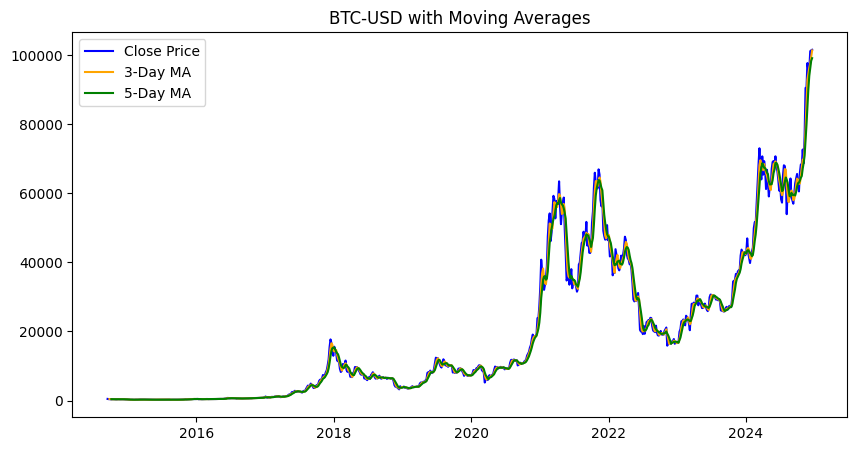

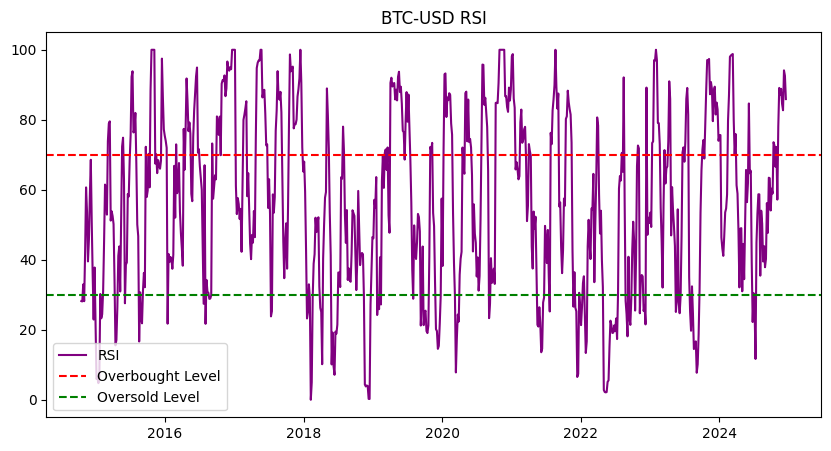

In [ ]:
# Menampilkan data dengan indikator teknikal
print(data)

# Plotting Moving Average
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label="Close Price", color='blue')
plt.plot(data['MA_3'], label="3-Day MA", color='orange')
plt.plot(data['MA_5'], label="5-Day MA", color='green')
plt.title("BTC-USD with Moving Averages")
plt.legend()
plt.show()

# Plotting RSI
plt.figure(figsize=(10, 5))
plt.plot(data['RSI'], label="RSI", color='purple')
plt.axhline(70, color='red', linestyle='--', label="Overbought Level")
plt.axhline(30, color='green', linestyle='--', label="Oversold Level")
plt.title("BTC-USD RSI")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0355
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0028
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0020
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0021
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0026
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0022
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0018
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020
Epoch 13/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epoch 14/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017
Epoch 15/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epoc

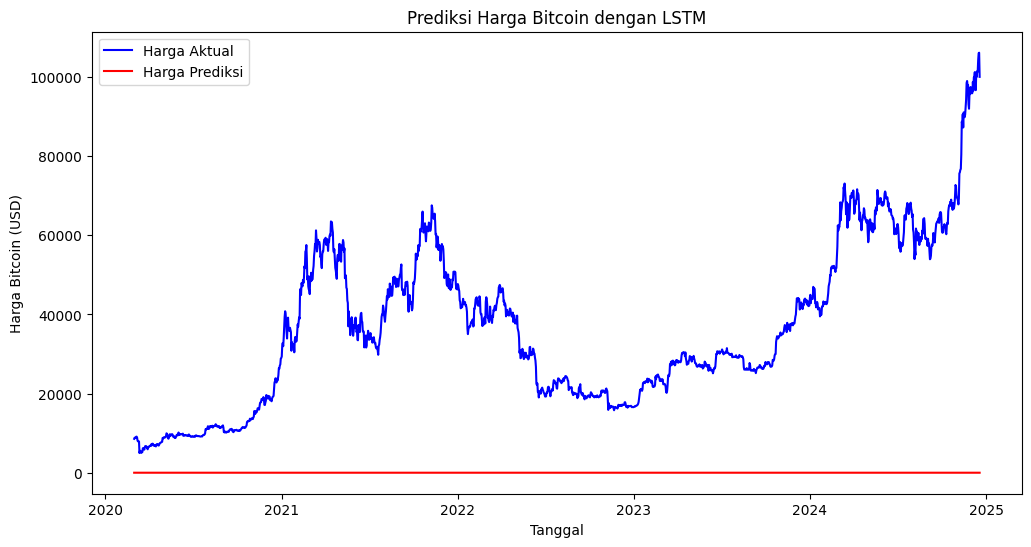

In [ ]:

# Import library yang dibutuhkan
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

# Langkah 1: Ambil data historis Bitcoin dari yfinance
# Gunakan simbol BTC-USD untuk Bitcoin dalam USD
btc_data = yf.download('BTC-USD', start='2020-01-01', end='2024-12-19')

# Pilih hanya harga penutupan (Close)
closing_prices = btc_data[['Close']]

# Langkah 2: Preprocessing data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Membuat dataset untuk LSTM
def create_dataset(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])  # 60 hari terakhir sebagai input
        y.append(data[i, 0])  # Hari berikutnya sebagai output
    return np.array(X), np.array(y)

time_steps = 60  # Jumlah hari untuk prediksi
X, y = create_dataset(scaled_data, time_steps)

# Reshape agar sesuai dengan input LSTM (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Langkah 3: Bangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output harga

model.compile(optimizer='adam', loss='mean_squared_error')

# Langkah 4: Train model
history = model.fit(X, y, epochs=50, batch_size=32, verbose=1)

# Langkah 5: Prediksi data validasi
# Ambil data 60 hari terakhir untuk prediksi
test_data = scaled_data[-time_steps:]
test_data = test_data.reshape((1, test_data.shape[0], 1))

predicted_price = model.predict(test_data)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Harga Bitcoin Prediksi: {predicted_price[0][0]} USD")

# Langkah 6: Visualisasi Hasil
# Plot harga aktual dan prediksi pada data pelatihan
plt.figure(figsize=(12, 6))
plt.plot(closing_prices.index[-len(y):], scaler.inverse_transform(y.reshape(-1, 1)), color='blue', label='Harga Aktual')
plt.plot(closing_prices.index[-len(y):], model.predict(X).reshape(-1, 1), color='red', label='Harga Prediksi')
plt.title('Prediksi Harga Bitcoin dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga Bitcoin (USD)')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Price           Adj Close          Close           High            Low  \
Ticker            BTC-USD        BTC-USD        BTC-USD        BTC-USD   
Date                                                                     
2024-12-14  101372.968750  101372.968750  102618.882812  100634.054688   
2024-12-15  104298.695312  104298.695312  105047.539062  101227.031250   
2024-12-16  106029.718750  106029.718750  107780.578125  103322.984375   
2024-12-17  106140.601562  106140.601562  108268.445312  105291.734375   
2024-12-18  100041.539062  100041.539062  106470.609375  100041.539062   

Price                Open       Volume            SMA            EMA  \
Ticker            BTC-USD      BTC-USD                                 
Date                                                                   
2024-12-14  101451.437500  40422968793   98838.987723   98850.205410   
2024-12-15  101373.531250  51145914137   99340.338170   99576.670730   
2024-12-16  104293.578125  91020417816  100066.

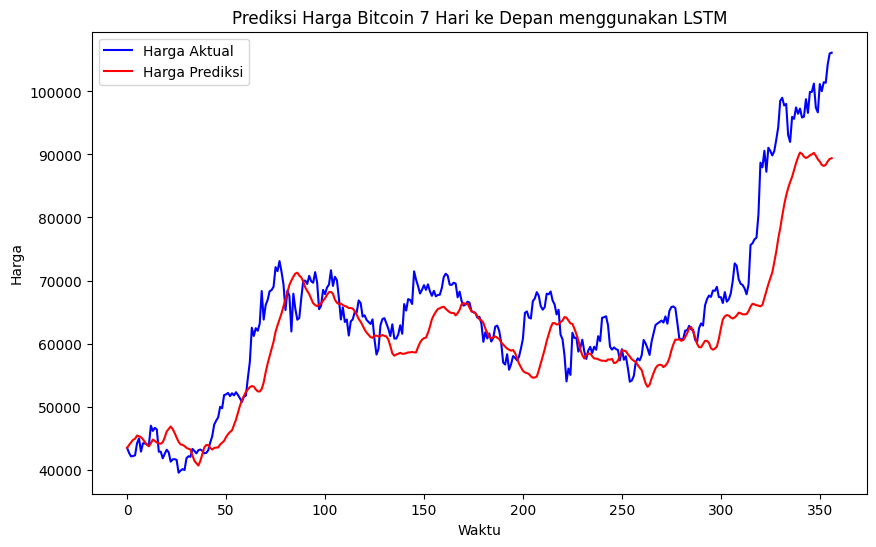

In [ ]:
# Import library yang dibutuhkan
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# 1. Mengunduh data Bitcoin (BTC-USD)
btc_data = yf.download('BTC-USD', start='2020-01-01', end='2024-12-19')

# 2. Menghitung Indikator Teknikal
btc_data['SMA'] = btc_data['Close'].rolling(window=14).mean()
btc_data['EMA'] = btc_data['Close'].ewm(span=14, adjust=False).mean()
delta = btc_data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
btc_data['RSI'] = 100 - (100 / (1 + rs))

btc_data['EMA12'] = btc_data['Close'].ewm(span=12, adjust=False).mean()
btc_data['EMA26'] = btc_data['Close'].ewm(span=26, adjust=False).mean()
btc_data['MACD'] = btc_data['EMA12'] - btc_data['EMA26']
btc_data['MACD_signal'] = btc_data['MACD'].ewm(span=9, adjust=False).mean()

btc_data['Middle_Band'] = btc_data['Close'].rolling(window=20).mean()
btc_data['Std_Dev'] = btc_data['Close'].rolling(window=20).std()
btc_data['BB_upper'] = btc_data['Middle_Band'] + (2 * btc_data['Std_Dev'])
btc_data['BB_lower'] = btc_data['Middle_Band'] - (2 * btc_data['Std_Dev'])

# Menghapus NaN setelah perhitungan indikator
btc_data.dropna(inplace=True)

# Menampilkan beberapa data terakhir
print(btc_data.tail())

# 3. Scaling data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_data[['Close', 'SMA', 'EMA', 'RSI', 'MACD', 'BB_upper', 'BB_lower']].values)

# 4. Membuat dataset untuk LSTM dengan prediksi 7 hari ke depan
def create_dataset(data, time_step=1, forecast_days=7):
    X, y = [], []
    for i in range(len(data) - time_step - forecast_days):
        X.append(data[i:(i + time_step), :])  # Ambil data untuk time_step hari sebelumnya
        y.append(data[i + time_step + forecast_days - 1, 0])  # Harga penutupan di hari ke-7 ke depan sebagai label
    return np.array(X), np.array(y)

time_step = 7  # Gunakan 7 hari sebelumnya untuk memprediksi 7 hari ke depan
forecast_days = 7  # Memperkirakan harga Bitcoin 7 hari ke depan
X, y = create_dataset(scaled_data, time_step, forecast_days)

# 5. Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 6. Membangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output berupa harga penutupan

model.compile(optimizer='adam', loss='mean_squared_error')

# 7. Melatih model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# 8. Evaluasi model dan prediksi
predicted_price = model.predict(X_test)

# Skala kembali hasil prediksi dan data asli
predicted_price = scaler.inverse_transform(np.concatenate((predicted_price, np.zeros((predicted_price.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]
actual_price = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

# Menghapus NaN pada predicted_price dan actual_price
valid_indices = ~np.isnan(predicted_price) & ~np.isnan(actual_price)
predicted_price = predicted_price[valid_indices]
actual_price = actual_price[valid_indices]

# 9. Menghitung RMSE dan MAPE
rmse = np.sqrt(mean_squared_error(actual_price, predicted_price))
mape = mean_absolute_percentage_error(actual_price, predicted_price)

# Tampilkan hasil error
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# 10. Plot hasil prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.plot(actual_price, color='blue', label='Harga Aktual')
plt.plot(predicted_price, color='red', label='Harga Prediksi')
plt.title('Prediksi Harga Bitcoin 7 Hari ke Depan menggunakan LSTM')
plt.xlabel('Waktu')
plt.ylabel('Harga')
plt.legend()
plt.show()


RSI MA DLL

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0271
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━

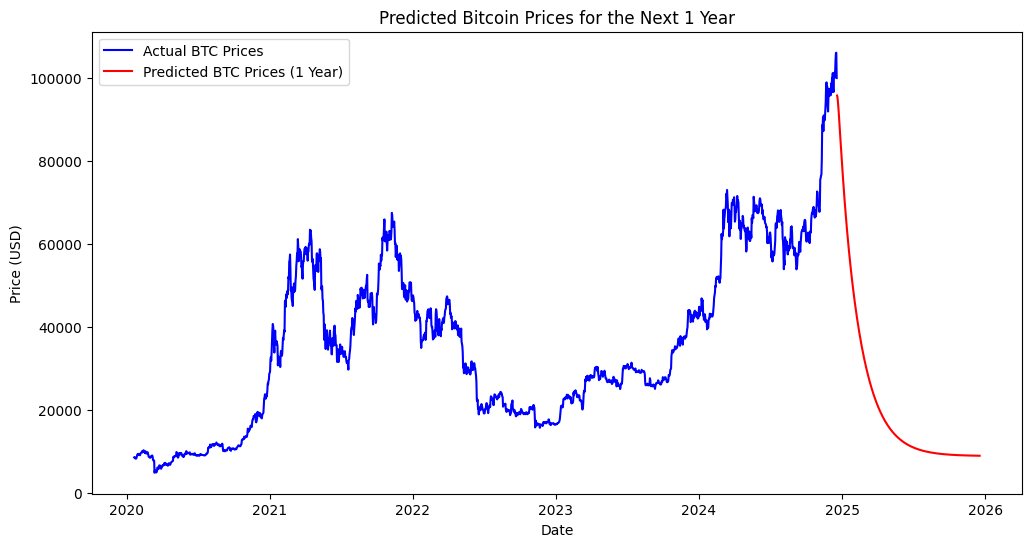

Mean Absolute Error (MAE): 48897.76106592466
Root Mean Squared Error (RMSE): 52616.28961098549


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Load and prepare the Bitcoin data (assuming you have a 'btc_data' DataFrame)
# Replace this line with actual code to load your BTC data
# For example, if you have a CSV file:
# btc_data = pd.read_csv('bitcoin_data.csv', date_parser=True, index_col='Date')

# For this example, I'll assume you already have a DataFrame named `btc_data` with 'Close' prices.

# Step 2: Preprocess the data (scale the data)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_data['Close'].values.reshape(-1, 1))

# Step 3: Prepare the training data (using a sliding window of 60 days)
time_steps = 60  # Use the last 60 days to predict the next day

# Prepare the data for LSTM
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])  # Last 60 days
        y.append(data[i, 0])  # The next day's price
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, time_steps)

# Reshape X to be 3D for LSTM input (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 4: Build and train the LSTM model
model = Sequential()

# LSTM layer with Dropout for regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

# Another LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected layer to predict the next price
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Step 5: Make predictions for the next 365 days (1 year)
days_in_year = 365

# Get the last 60 days of data from the training set
last_60_days = scaled_data[-time_steps:]

# List to store predictions
predicted_prices = []

# Predict the next 365 days
for i in range(days_in_year):
    # Reshape input data to match LSTM's expected shape
    input_data = last_60_days.reshape((1, last_60_days.shape[0], 1))
    predicted_price = model.predict(input_data)
    predicted_prices.append(predicted_price[0][0])

    # Update last_60_days to include the predicted price
    last_60_days = np.append(last_60_days[1:], predicted_price, axis=0)

# Convert the predictions back to the original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Step 6: Visualize the results
# Create a date range for the predicted future dates
predicted_dates = pd.date_range(start=btc_data.index[-1], periods=days_in_year+1, freq='D')[1:]

# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['Close'], color='blue', label='Actual BTC Prices')
plt.plot(predicted_dates, predicted_prices, color='red', label='Predicted BTC Prices (1 Year)')
plt.title('Predicted Bitcoin Prices for the Next 1 Year')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Step 7: Evaluate the model's accuracy (if actual future data is available)
# For evaluation, we assume that you have actual BTC prices for the next year in 'actual_prices'
# In this example, I'm assuming you have this data available for comparison.

# For this example, we'll generate dummy 'actual_prices' (replace this with real future data if you have it)
# Example: actual_prices = btc_data['Close'][-365:].values (if you have actual BTC prices for the next year)

# Actual prices (for the sake of this example, we'll assume it's the last year of data in the DataFrame)
# In real scenarios, replace this with actual future prices data if available
actual_prices = btc_data['Close'][-days_in_year:].values  # Assuming last 365 days are the actual prices for evaluation

# Calculate MAE and RMSE
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))

# Print evaluation results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


7 hari

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0309
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0020
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


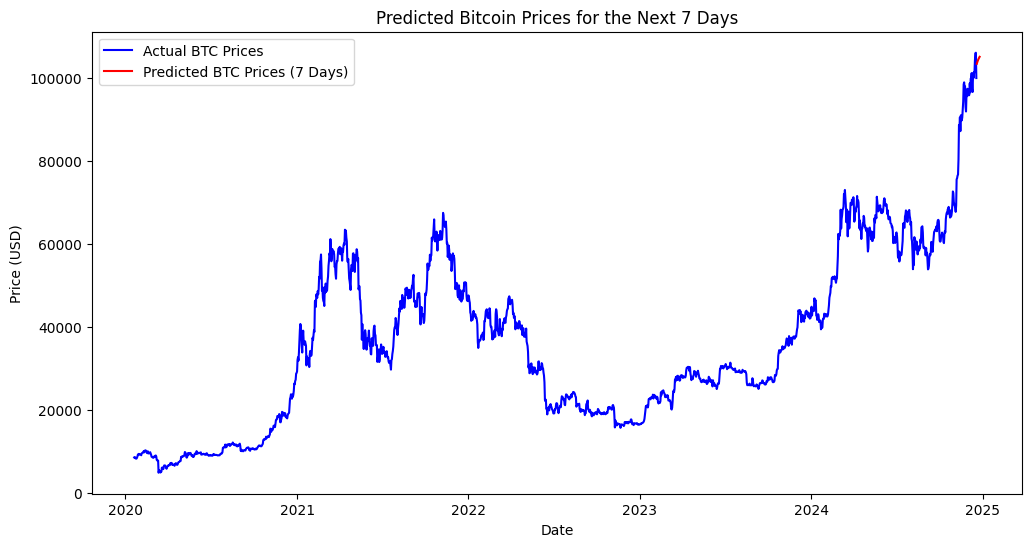

Mean Absolute Error (MAE): 2350.7801339285716
Root Mean Squared Error (RMSE): 2800.088664954646


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Load and prepare the Bitcoin data (assuming you have a 'btc_data' DataFrame)
# Replace this line with actual code to load your BTC data
# For example, if you have a CSV file:
# btc_data = pd.read_csv('bitcoin_data.csv', date_parser=True, index_col='Date')

# For this example, I'll assume you already have a DataFrame named `btc_data` with 'Close' prices.

# Step 2: Preprocess the data (scale the data)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_data['Close'].values.reshape(-1, 1))

# Step 3: Prepare the training data (using a sliding window of 60 days)
time_steps = 60  # Use the last 60 days to predict the next day

# Prepare the data for LSTM
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])  # Last 60 days
        y.append(data[i, 0])  # The next day's price
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, time_steps)

# Reshape X to be 3D for LSTM input (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 4: Build and train the LSTM model
model = Sequential()

# LSTM layer with Dropout for regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

# Another LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected layer to predict the next price
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Step 5: Make predictions for the next 7 days (1 week)
days_in_week = 7  # We now predict for 7 days

# Get the last 60 days of data from the training set
last_60_days = scaled_data[-time_steps:]

# List to store predictions
predicted_prices = []

# Predict the next 7 days
for i in range(days_in_week):
    # Reshape input data to match LSTM's expected shape
    input_data = last_60_days.reshape((1, last_60_days.shape[0], 1))
    predicted_price = model.predict(input_data)
    predicted_prices.append(predicted_price[0][0])

    # Update last_60_days to include the predicted price
    last_60_days = np.append(last_60_days[1:], predicted_price, axis=0)

# Convert the predictions back to the original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Step 6: Visualize the results
# Create a date range for the predicted future dates
predicted_dates = pd.date_range(start=btc_data.index[-1], periods=days_in_week+1, freq='D')[1:]

# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['Close'], color='blue', label='Actual BTC Prices')
plt.plot(predicted_dates, predicted_prices, color='red', label='Predicted BTC Prices (7 Days)')
plt.title('Predicted Bitcoin Prices for the Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Step 7: Evaluate the model's accuracy (if actual future data is available)
# For evaluation, we assume that you have actual BTC prices for the next 7 days in 'actual_prices'
# In this example, I'm assuming you have this data available for comparison.

# For this example, we'll generate dummy 'actual_prices' (replace this with real future data if you have it)
# Example: actual_prices = btc_data['Close'][-7:].values (if you have actual BTC prices for the next 7 days)

# Actual prices (for the sake of this example, we'll assume it's the last 7 days of data in the DataFrame)
# In real scenarios, replace this with actual future prices data if available
actual_prices = btc_data['Close'][-days_in_week:].values  # Assuming last 7 days are the actual prices for evaluation

# Calculate MAE and RMSE
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))

# Print evaluation results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0310
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0027
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


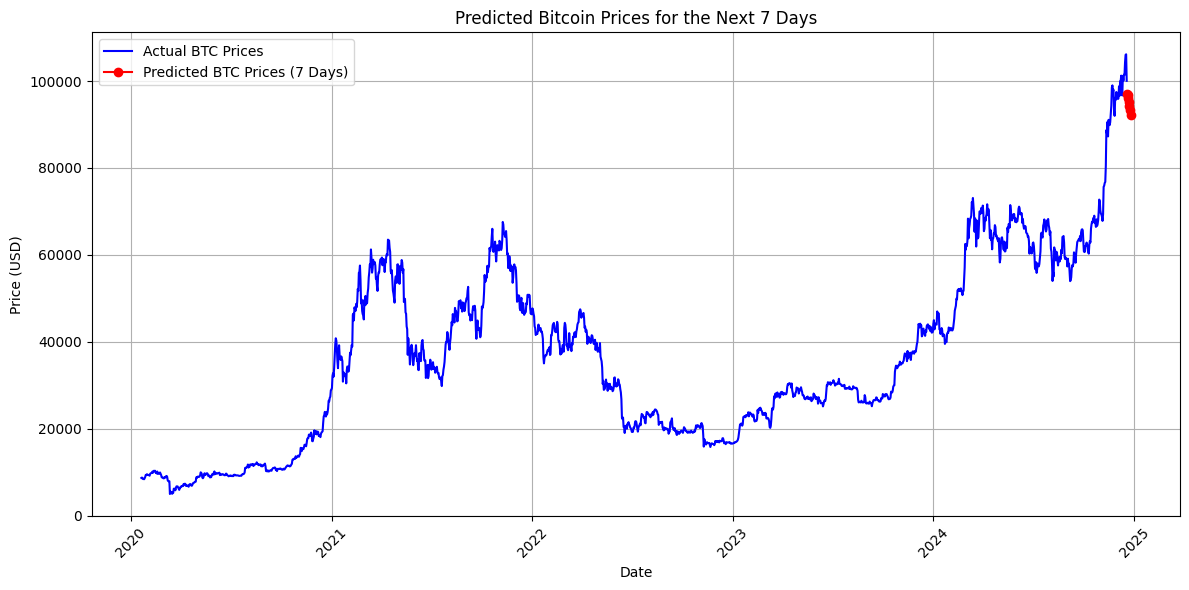

Mean Absolute Error (MAE): 7823.3515625
Root Mean Squared Error (RMSE): 8528.435129668289


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Load and prepare the Bitcoin data (assuming you have a 'btc_data' DataFrame)
# For example, load your data (replace with your actual dataset loading method)
# btc_data = pd.read_csv('bitcoin_data.csv', date_parser=True, index_col='Date')

# For this example, I'll assume you already have a DataFrame named `btc_data` with 'Close' prices.

# Step 2: Preprocess the data (scale the data)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_data['Close'].values.reshape(-1, 1))

# Step 3: Prepare the training data (using a sliding window of 60 days)
time_steps = 60  # Use the last 60 days to predict the next day

# Prepare the data for LSTM
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])  # Last 60 days
        y.append(data[i, 0])  # The next day's price
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, time_steps)

# Reshape X to be 3D for LSTM input (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 4: Build and train the LSTM model
model = Sequential()

# LSTM layer with Dropout for regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

# Another LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected layer to predict the next price
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Step 5: Make predictions for the next 7 days (1 week)
days_in_week = 7  # We now predict for 7 days

# Get the last 60 days of data from the training set
last_60_days = scaled_data[-time_steps:]

# List to store predictions
predicted_prices = []

# Predict the next 7 days
for i in range(days_in_week):
    # Reshape input data to match LSTM's expected shape
    input_data = last_60_days.reshape((1, last_60_days.shape[0], 1))
    predicted_price = model.predict(input_data)
    predicted_prices.append(predicted_price[0][0])

    # Update last_60_days to include the predicted price
    last_60_days = np.append(last_60_days[1:], predicted_price, axis=0)

# Convert the predictions back to the original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Step 6: Visualize the results (with daily granularity for the next 7 days)
# Create a date range for the predicted future dates (7 days ahead)
predicted_dates = pd.date_range(start=btc_data.index[-1], periods=days_in_week+1, freq='D')[1:]

# Plot actual and predicted prices with detailed daily granularity
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['Close'], color='blue', label='Actual BTC Prices')
plt.plot(predicted_dates, predicted_prices, color='red', marker='o', label='Predicted BTC Prices (7 Days)')
plt.title('Predicted Bitcoin Prices for the Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)  # Add gridlines for better readability
plt.legend()
plt.tight_layout()
plt.show()

# Step 7: Evaluate the model's accuracy (if actual future data is available)
# For evaluation, we assume that you have actual BTC prices for the next 7 days in 'actual_prices'
# In this example, I'm assuming you have this data available for comparison.

# Actual prices (for the sake of this example, we'll assume it's the last 7 days of data in the DataFrame)
# In real scenarios, replace this with actual future prices data if available
actual_prices = btc_data['Close'][-days_in_week:].values  # Assuming last 7 days are the actual prices for evaluation

# Calculate MAE and RMSE
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))

# Print evaluation results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0361
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━

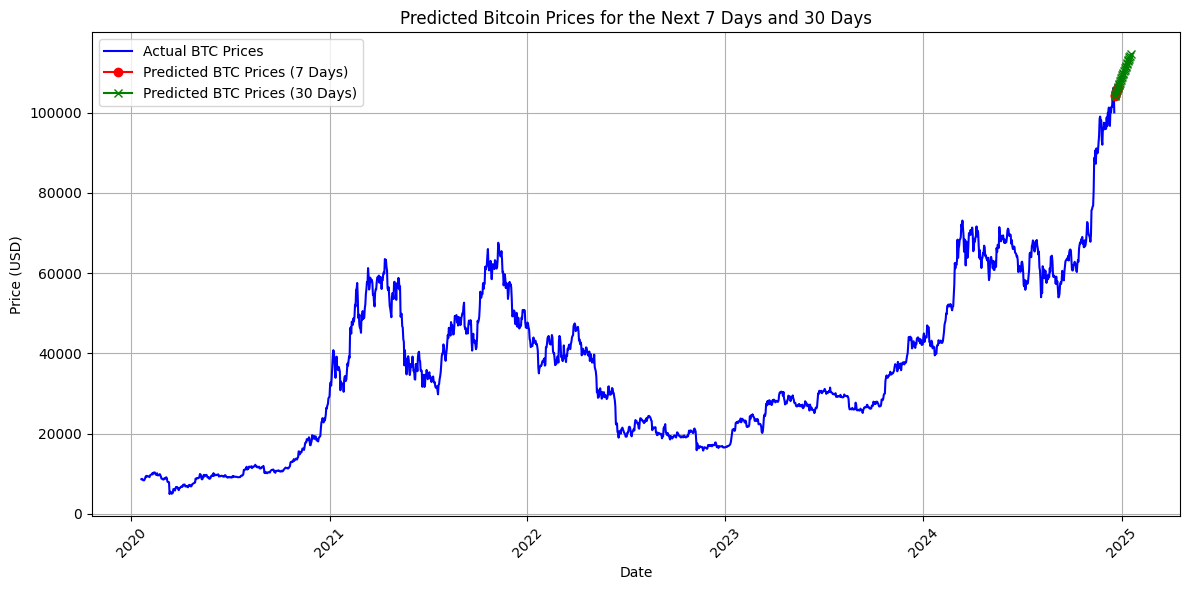

Daily Prediction Mean Absolute Error (MAE): 2614.0848214285716
Daily Prediction Root Mean Squared Error (RMSE): 3351.633407375652
Monthly Prediction Mean Absolute Error (MAE): 11021.879947916666
Monthly Prediction Root Mean Squared Error (RMSE): 11265.9974999884


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Load and prepare the Bitcoin data (assuming you have a 'btc_data' DataFrame)
# For example, load your data (replace with your actual dataset loading method)
# btc_data = pd.read_csv('bitcoin_data.csv', date_parser=True, index_col='Date')

# For this example, I'll assume you already have a DataFrame named `btc_data` with 'Close' prices.

# Step 2: Preprocess the data (scale the data)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_data['Close'].values.reshape(-1, 1))

# Step 3: Prepare the training data (using a sliding window of 60 days)
time_steps = 60  # Use the last 60 days to predict the next day

# Prepare the data for LSTM
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])  # Last 60 days
        y.append(data[i, 0])  # The next day's price
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, time_steps)

# Reshape X to be 3D for LSTM input (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 4: Build and train the LSTM model
model = Sequential()

# LSTM layer with Dropout for regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

# Another LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected layer to predict the next price
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Step 5: Make predictions for the next 7 days (1 week)
days_in_week = 7  # We now predict for 7 days

# Get the last 60 days of data from the training set
last_60_days = scaled_data[-time_steps:]

# List to store daily predictions
predicted_prices_daily = []

# Predict the next 7 days (daily predictions)
for i in range(days_in_week):
    # Reshape input data to match LSTM's expected shape
    input_data = last_60_days.reshape((1, last_60_days.shape[0], 1))
    predicted_price = model.predict(input_data)
    predicted_prices_daily.append(predicted_price[0][0])

    # Update last_60_days to include the predicted price
    last_60_days = np.append(last_60_days[1:], predicted_price, axis=0)

# Convert the daily predictions back to the original scale
predicted_prices_daily = scaler.inverse_transform(np.array(predicted_prices_daily).reshape(-1, 1))

# Step 6: Make predictions for the next 30 days (1 month)
days_in_month = 30  # We now predict for 30 days

# Get the last 60 days of data from the training set
last_60_days = scaled_data[-time_steps:]

# List to store monthly predictions
predicted_prices_monthly = []

# Predict the next 30 days (monthly predictions)
for i in range(days_in_month):
    # Reshape input data to match LSTM's expected shape
    input_data = last_60_days.reshape((1, last_60_days.shape[0], 1))
    predicted_price = model.predict(input_data)
    predicted_prices_monthly.append(predicted_price[0][0])

    # Update last_60_days to include the predicted price
    last_60_days = np.append(last_60_days[1:], predicted_price, axis=0)

# Convert the monthly predictions back to the original scale
predicted_prices_monthly = scaler.inverse_transform(np.array(predicted_prices_monthly).reshape(-1, 1))

# Step 7: Visualize the results (with daily and monthly predictions)
# Create a date range for the predicted future dates (7 days ahead for daily predictions)
predicted_dates_daily = pd.date_range(start=btc_data.index[-1], periods=days_in_week+1, freq='D')[1:]

# Create a date range for the predicted future dates (30 days ahead for monthly predictions)
predicted_dates_monthly = pd.date_range(start=btc_data.index[-1], periods=days_in_month+1, freq='D')[1:]

# Plot actual and predicted prices with both daily and monthly granularity
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['Close'], color='blue', label='Actual BTC Prices')
plt.plot(predicted_dates_daily, predicted_prices_daily, color='red', marker='o', label='Predicted BTC Prices (7 Days)')
plt.plot(predicted_dates_monthly, predicted_prices_monthly, color='green', marker='x', label='Predicted BTC Prices (30 Days)')
plt.title('Predicted Bitcoin Prices for the Next 7 Days and 30 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)  # Add gridlines for better readability
plt.legend()
plt.tight_layout()
plt.show()

# Step 8: Evaluate the model's accuracy (if actual future data is available)
# For evaluation, we assume that you have actual BTC prices for the next 7 days and 30 days in 'actual_prices'
# In this example, I'm assuming you have this data available for comparison.

# Actual prices (for the sake of this example, we'll assume it's the last 30 days of data in the DataFrame)
# In real scenarios, replace this with actual future prices data if available
actual_prices_daily = btc_data['Close'][-days_in_week:].values  # Assuming last 7 days are the actual prices for evaluation
actual_prices_monthly = btc_data['Close'][-days_in_month:].values  # Assuming last 30 days are the actual prices for evaluation

# Calculate MAE and RMSE for both daily and monthly predictions
mae_daily = mean_absolute_error(actual_prices_daily, predicted_prices_daily)
rmse_daily = math.sqrt(mean_squared_error(actual_prices_daily, predicted_prices_daily))

mae_monthly = mean_absolute_error(actual_prices_monthly, predicted_prices_monthly)
rmse_monthly = math.sqrt(mean_squared_error(actual_prices_monthly, predicted_prices_monthly))

# Print evaluation results for daily and monthly predictions
print(f'Daily Prediction Mean Absolute Error (MAE): {mae_daily}')
print(f'Daily Prediction Root Mean Squared Error (RMSE): {rmse_daily}')
print(f'Monthly Prediction Mean Absolute Error (MAE): {mae_monthly}')
print(f'Monthly Prediction Root Mean Squared Error (RMSE): {rmse_monthly}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0359
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0025
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━

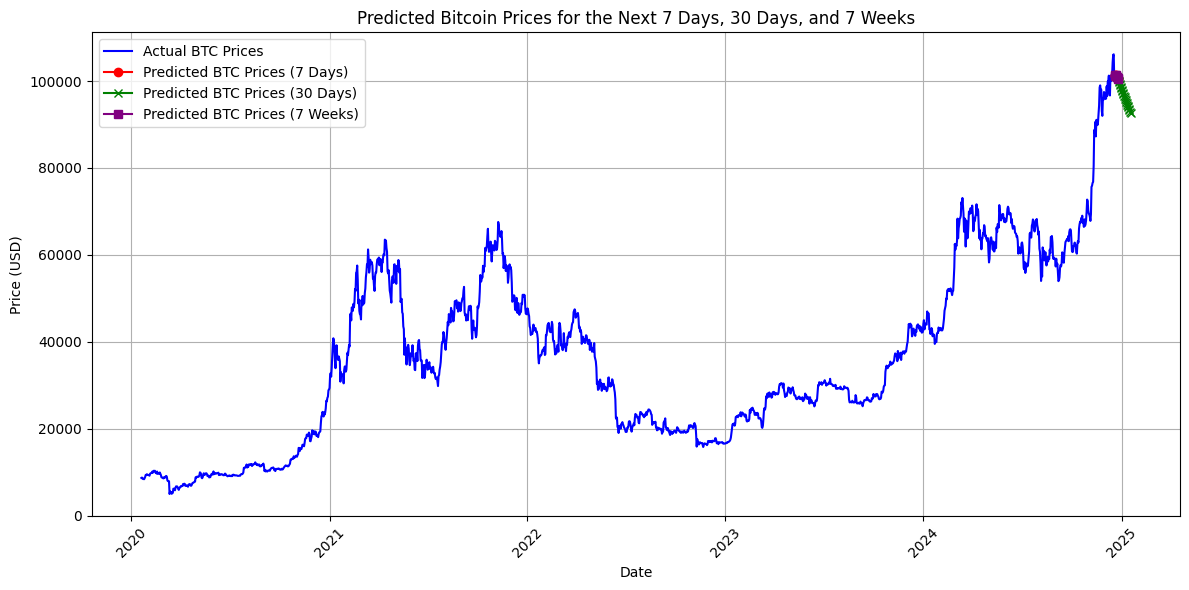

Daily Prediction Mean Absolute Error (MAE): 2206.9319196428573
Daily Prediction Root Mean Squared Error (RMSE): 3106.8823416143127
Monthly Prediction Mean Absolute Error (MAE): 4855.33125
Monthly Prediction Root Mean Squared Error (RMSE): 5939.821902438694
Weekly Prediction Mean Absolute Error (MAE): 2206.9319196428573
Weekly Prediction Root Mean Squared Error (RMSE): 3106.8823416143127


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Load and prepare the Bitcoin data (assuming you have a 'btc_data' DataFrame)
# For example, load your data (replace with your actual dataset loading method)
# btc_data = pd.read_csv('bitcoin_data.csv', date_parser=True, index_col='Date')

# For this example, I'll assume you already have a DataFrame named `btc_data` with 'Close' prices.

# Step 2: Preprocess the data (scale the data)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_data['Close'].values.reshape(-1, 1))

# Step 3: Prepare the training data (using a sliding window of 60 days)
time_steps = 60  # Use the last 60 days to predict the next day

# Prepare the data for LSTM
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])  # Last 60 days
        y.append(data[i, 0])  # The next day's price
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, time_steps)

# Reshape X to be 3D for LSTM input (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 4: Build and train the LSTM model
model = Sequential()

# LSTM layer with Dropout for regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

# Another LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected layer to predict the next price
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Step 5: Make predictions for the next 7 days (1 week)
days_in_week = 7  # We now predict for 7 days

# Get the last 60 days of data from the training set
last_60_days = scaled_data[-time_steps:]

# List to store daily predictions
predicted_prices_daily = []

# Predict the next 7 days (daily predictions)
for i in range(days_in_week):
    # Reshape input data to match LSTM's expected shape
    input_data = last_60_days.reshape((1, last_60_days.shape[0], 1))
    predicted_price = model.predict(input_data)
    predicted_prices_daily.append(predicted_price[0][0])

    # Update last_60_days to include the predicted price
    last_60_days = np.append(last_60_days[1:], predicted_price, axis=0)

# Convert the daily predictions back to the original scale
predicted_prices_daily = scaler.inverse_transform(np.array(predicted_prices_daily).reshape(-1, 1))

# Step 6: Make predictions for the next 30 days (1 month)
days_in_month = 30  # We now predict for 30 days

# Get the last 60 days of data from the training set
last_60_days = scaled_data[-time_steps:]

# List to store monthly predictions
predicted_prices_monthly = []

# Predict the next 30 days (monthly predictions)
for i in range(days_in_month):
    # Reshape input data to match LSTM's expected shape
    input_data = last_60_days.reshape((1, last_60_days.shape[0], 1))
    predicted_price = model.predict(input_data)
    predicted_prices_monthly.append(predicted_price[0][0])

    # Update last_60_days to include the predicted price
    last_60_days = np.append(last_60_days[1:], predicted_price, axis=0)

# Convert the monthly predictions back to the original scale
predicted_prices_monthly = scaler.inverse_transform(np.array(predicted_prices_monthly).reshape(-1, 1))

# Step 7: Make predictions for the next 7 weeks (49 days)
weeks_in_month = 7  # We now predict for 7 weeks (49 days)

# Get the last 60 days of data from the training set
last_60_days = scaled_data[-time_steps:]

# List to store weekly predictions
predicted_prices_weekly = []

# Predict the next 49 days (weekly predictions)
for i in range(weeks_in_month):
    # Reshape input data to match LSTM's expected shape
    input_data = last_60_days.reshape((1, last_60_days.shape[0], 1))
    predicted_price = model.predict(input_data)
    predicted_prices_weekly.append(predicted_price[0][0])

    # Update last_60_days to include the predicted price
    last_60_days = np.append(last_60_days[1:], predicted_price, axis=0)

# Convert the weekly predictions back to the original scale
predicted_prices_weekly = scaler.inverse_transform(np.array(predicted_prices_weekly).reshape(-1, 1))

# Step 8: Visualize the results (with daily, monthly, and weekly predictions)
# Create a date range for the predicted future dates (7 days ahead for daily predictions)
predicted_dates_daily = pd.date_range(start=btc_data.index[-1], periods=days_in_week+1, freq='D')[1:]

# Create a date range for the predicted future dates (30 days ahead for monthly predictions)
predicted_dates_monthly = pd.date_range(start=btc_data.index[-1], periods=days_in_month+1, freq='D')[1:]

# Create a date range for the predicted future dates (49 days ahead for weekly predictions)
predicted_dates_weekly = pd.date_range(start=btc_data.index[-1], periods=weeks_in_month+1, freq='D')[1:]

# Plot actual and predicted prices with daily, monthly, and weekly granularity
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['Close'], color='blue', label='Actual BTC Prices')
plt.plot(predicted_dates_daily, predicted_prices_daily, color='red', marker='o', label='Predicted BTC Prices (7 Days)')
plt.plot(predicted_dates_monthly, predicted_prices_monthly, color='green', marker='x', label='Predicted BTC Prices (30 Days)')
plt.plot(predicted_dates_weekly, predicted_prices_weekly, color='purple', marker='s', label='Predicted BTC Prices (7 Weeks)')
plt.title('Predicted Bitcoin Prices for the Next 7 Days, 30 Days, and 7 Weeks')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)  # Add gridlines for better readability
plt.legend()
plt.tight_layout()
plt.show()

# Step 9: Evaluate the model's accuracy (if actual future data is available)
# For evaluation, we assume that you have actual BTC prices for the next 7 days and 30 days in 'actual_prices'
# In this example, I'm assuming you have this data available for comparison.

# Actual prices (for the sake of this example, we'll assume it's the last 49 days of data in the DataFrame)
# In real scenarios, replace this with actual future prices data if available
actual_prices_weekly = btc_data['Close'][-weeks_in_month:].values  # Assuming last 49 days are the actual prices for evaluation
actual_prices_monthly = btc_data['Close'][-days_in_month:].values  # Assuming last 30 days are the actual prices for evaluation
actual_prices_daily = btc_data['Close'][-days_in_week:].values  # Assuming last 7 days are the actual prices for evaluation

# Calculate MAE and RMSE for daily, monthly, and weekly predictions
mae_daily = mean_absolute_error(actual_prices_daily, predicted_prices_daily)
rmse_daily = math.sqrt(mean_squared_error(actual_prices_daily, predicted_prices_daily))

mae_monthly = mean_absolute_error(actual_prices_monthly, predicted_prices_monthly)
rmse_monthly = math.sqrt(mean_squared_error(actual_prices_monthly, predicted_prices_monthly))

mae_weekly = mean_absolute_error(actual_prices_weekly, predicted_prices_weekly)
rmse_weekly = math.sqrt(mean_squared_error(actual_prices_weekly, predicted_prices_weekly))

# Print evaluation results for daily, monthly, and weekly predictions
print(f'Daily Prediction Mean Absolute Error (MAE): {mae_daily}')
print(f'Daily Prediction Root Mean Squared Error (RMSE): {rmse_daily}')
print(f'Monthly Prediction Mean Absolute Error (MAE): {mae_monthly}')
print(f'Monthly Prediction Root Mean Squared Error (RMSE): {rmse_monthly}')
print(f'Weekly Prediction Mean Absolute Error (MAE): {mae_weekly}')
print(f'Weekly Prediction Root Mean Squared Error (RMSE): {rmse_weekly}')
